#### Próximo Hit Spotify
##### Rodrigo Hu Tchie Lee - Turma 11 - Ateliê 1

In [69]:
import pandas as pd
import numpy as np
import seaborn as sb
import matplotlib.pyplot as plt

#Sklearn
from sklearn.preprocessing import LabelEncoder
from sklearn.preprocessing import StandardScaler
from sklearn.model_selection import train_test_split
from sklearn.cluster import KMeans
from sklearn.metrics import accuracy_score

In [70]:
# Bibliotecas Testando Diferentes Modelos
from sklearn.tree import DecisionTreeClassifier
from sklearn.model_selection import train_test_split, GridSearchCV
from sklearn.metrics import classification_report, confusion_matrix, roc_auc_score
from sklearn import svm
from sklearn.ensemble import RandomForestClassifier
from sklearn.preprocessing import LabelEncoder

In [71]:
# Carregando os Dados
df_sample = pd.read_csv('sample_submission.csv')

In [72]:

df_train = pd.read_csv('train.csv')
df_test = pd.read_csv('test.csv')


In [73]:
df_test

,track_unique_id,track_id,artists,album_name,track_name,duration_ms,explicit,danceability,energy,key,loudness,mode,speechiness,acousticness,instrumentalness,liveness,valence,tempo,time_signature,track_genre
0,113186,6KwkVtXm8OUp2XffN5k7lY,Hillsong Worship,No Other Name,No Other Name,440247,False,0.369,0.598,7,-6.984,1,0.0304,0.005110,0.000000,0.176,0.0466,148.014,4,world-music
1,42819,2dp5I5MJ8bQQHDoFaNRFtX,Internal Rot,Grieving Birth,Failed Organum,93933,False,0.171,0.997,7,-3.586,1,0.1180,0.005210,0.801000,0.420,0.0294,122.223,4,grindcore
2,59311,5avw06usmFkFrPjX8NxC40,Zhoobin Askarieh;Ali Sasha,Noise A Noise 20.4-1,"Save the Trees, Pt. 1",213578,False,0.173,0.803,9,-10.071,0,0.1440,0.613000,0.001910,0.195,0.0887,75.564,3,iranian
3,91368,75hT0hvlESnDJstem0JgyR,Bryan Adams,All I Want For Christmas Is You,Merry Christmas,151387,False,0.683,0.511,6,-5.598,1,0.0279,0.406000,0.000197,0.111,0.5980,109.991,3,rock
4,61000,4bY2oZGA5Br3pTE1Jd1IfY,Nogizaka46,バレッタ TypeD,月の大きさ,236293,False,0.555,0.941,9,-3.294,0,0.0481,0.484000,0.000000,0.266,0.8130,92.487,4,j-idol
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
34195,39480,3gD88GyMS2EVa1bSX834LH,Mickie Krause,Ballermann Hits Party 2023,Jan Pillemann Otze - Goldversion 2022,216650,False,0.597,0.980,7,-2.075,1,0.0636,0.004270,0.000035,0.293,0.6330,139.989,4,german
34196,74692,6m3xyaUiqkNQCpuGFA5ABK,Fábio Jr.,Mega Hits - Fábio Jr.,Esqueça (Forget Him),219493,False,0.454,0.367,0,-12.251,1,0.0285,0.137000,0.000029,0.171,0.1420,113.250,4,mpb
34197,53782,3qd1eI1GA0FwC3VHcxHhDC,Imanbek;KDDK;KIDDO;Wiz Khalifa,Ordinary Life (KDDK Phonk Remix),Ordinary Life - KDDK Phonk Remix,165333,True,0.687,0.915,0,-1.342,1,0.0411,0.021000,0.000006,0.151,0.2720,89.962,4,house
34198,41890,02irDahUHwaZAhr2cdumxr,The Gathering,If_then_else,Colorado Incident,293040,False,0.362,0.668,0,-9.578,1,0.0432,0.000406,0.009400,0.131,0.1580,122.234,4,goth


### Compreensão dos Dados

#### Exploração de dados

Aqui foi feita a exploração dos dados com o objetivo de compreender os dados, para poder eventualmente construir o modelo.

In [74]:
df_train.columns

Index(['track_unique_id', 'track_id', 'artists', 'album_name', 'track_name',
       'duration_ms', 'explicit', 'danceability', 'energy', 'key', 'loudness',
       'mode', 'speechiness', 'acousticness', 'instrumentalness', 'liveness',
       'valence', 'tempo', 'time_signature', 'track_genre',
       'popularity_target'],
      dtype='object')

#### Limpeza dos dados

Não foi preciso fazer uma limpeza muito extensa dos dados, especialmente que quando verificado a tabela não mostrou nenhuma valor nulo. O principal que foi feito, foi o labelencode dos dados.

##### Codificação de Variáveis Categóricas

In [75]:
Label_encoder_train_track_genre = LabelEncoder()
Label_encoder_train_explicit = LabelEncoder()
Label_encoder_train_artists = LabelEncoder()
Label_encoder_train_track_id = LabelEncoder()
Label_encoder_train_album_name = LabelEncoder()
Label_encoder_train_track_name = LabelEncoder()
Label_encoder_train_key = LabelEncoder()
Label_encoder_train_mode = LabelEncoder()
Label_encoder_train_time_signature = LabelEncoder()

# Label encoding de varias diferentes variáveis de TREINO
df_train['track_genre'] = Label_encoder_train_track_genre.fit_transform(df_train['track_genre'])
df_train['explicit'] = Label_encoder_train_explicit.fit_transform(df_train['explicit'])
df_train['artists'] = Label_encoder_train_artists.fit_transform(df_train['artists'])
df_train['track_id'] = Label_encoder_train_track_id.fit_transform(df_train['track_id'])
df_train['album_name'] = Label_encoder_train_album_name.fit_transform(df_train['album_name'])
df_train['track_name'] = Label_encoder_train_track_name.fit_transform(df_train['track_name'])
df_train['key'] = Label_encoder_train_key.fit_transform(df_train['key'])
df_train['mode'] = Label_encoder_train_mode.fit_transform(df_train['mode'])
df_train['time_signature'] = Label_encoder_train_time_signature.fit_transform(df_train['time_signature'])

In [76]:
Label_encoder_test_track_genre = LabelEncoder()
Label_encoder_test_explicit = LabelEncoder()
Label_encoder_test_artists = LabelEncoder()
Label_encoder_test_track_id = LabelEncoder()
Label_encoder_test_album_name = LabelEncoder()
Label_encoder_test_track_name = LabelEncoder()
Label_encoder_test_key = LabelEncoder()
Label_encoder_test_mode = LabelEncoder()
Label_encoder_test_time_signature = LabelEncoder()

# Label encoding de varias diferentes variáveis de TESTE
df_test['track_genre'] = Label_encoder_test_track_genre.fit_transform(df_test['track_genre'])
df_test['explicit'] = Label_encoder_test_explicit.fit_transform(df_test['explicit'])
df_test['artists'] = Label_encoder_test_artists.fit_transform(df_test['artists'])
df_test['track_id'] = Label_encoder_test_track_id.fit_transform(df_test['track_id'])
df_test['album_name'] = Label_encoder_test_album_name.fit_transform(df_test['album_name'])
df_test['track_name'] = Label_encoder_test_track_name.fit_transform(df_test['track_name'])
df_test['key'] = Label_encoder_test_key.fit_transform(df_test['key'])
df_test['mode'] = Label_encoder_test_mode.fit_transform(df_test['mode'])
df_test['time_signature'] = Label_encoder_test_time_signature.fit_transform(df_test['time_signature'])

Sendo que não possui nenhum valor nulo, não foi necessário fazer a limpeza dos dados.

In [77]:
df_train.isnull().sum()

track_unique_id      0
track_id             0
artists              0
album_name           0
track_name           0
duration_ms          0
explicit             0
danceability         0
energy               0
key                  0
loudness             0
mode                 0
speechiness          0
acousticness         0
instrumentalness     0
liveness             0
valence              0
tempo                0
time_signature       0
track_genre          0
popularity_target    0
dtype: int64

#### Pré-Processamento dos dados

In [78]:
# Cria uma função extendida de descrever (estatísticas descritivas)
def describeExtended(data):
    description = data.describe()

    # Adiciona a mediana, variância e moda para a função describe	
    description.loc['var'] = data.var()
    description.loc['median'] = data.median()
    description.loc['mode'] = data.mode().iloc[0]
    return description

In [79]:
print(describeExtended(df_train.duration_ms))

count     7.980000e+04
mean      2.279022e+05
std       1.050599e+05
min       1.338600e+04
25%       1.744360e+05
50%       2.128130e+05
75%       2.614260e+05
max       5.237295e+06
var       1.103758e+10
median    2.128130e+05
mode      1.628970e+05
Name: duration_ms, dtype: float64


In [80]:
print(describeExtended(df_train.danceability))

count     79800.000000
mean          0.567318
std           0.173110
min           0.000000
25%           0.456000
50%           0.581000
75%           0.695000
max           0.985000
var           0.029967
median        0.581000
mode          0.647000
Name: danceability, dtype: float64


In [81]:
print(describeExtended(df_train.energy))

count     79800.000000
mean          0.641529
std           0.251441
min           0.000019
25%           0.472000
50%           0.685000
75%           0.854000
max           1.000000
var           0.063223
median        0.685000
mode          0.876000
Name: energy, dtype: float64


In [82]:
print(describeExtended(df_train.tempo))

count     79800.000000
mean        122.076559
std          29.941937
min           0.000000
25%          99.081250
50%         122.009000
75%         140.054000
max         222.605000
var         896.519601
median      122.009000
mode        151.925000
Name: tempo, dtype: float64


In [83]:
df_train.columns

Index(['track_unique_id', 'track_id', 'artists', 'album_name', 'track_name',
       'duration_ms', 'explicit', 'danceability', 'energy', 'key', 'loudness',
       'mode', 'speechiness', 'acousticness', 'instrumentalness', 'liveness',
       'valence', 'tempo', 'time_signature', 'track_genre',
       'popularity_target'],
      dtype='object')

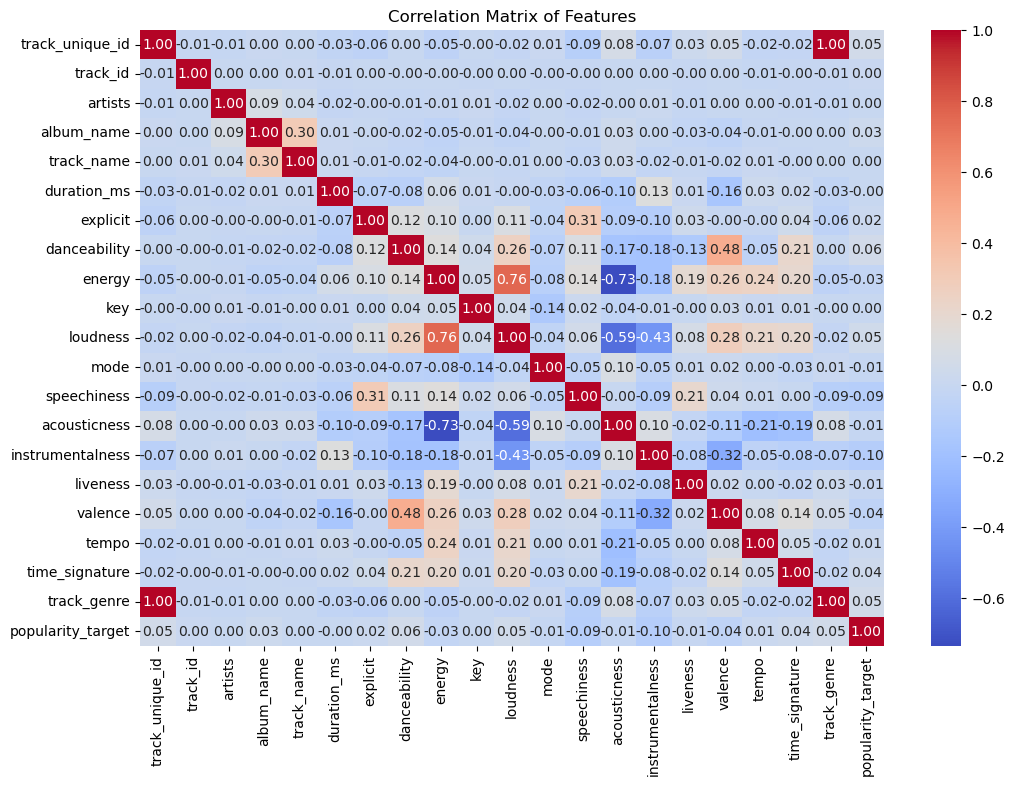

In [84]:
# Matriz de correlação figuras numéricas
plt.figure(figsize=(12, 8))
corr_matrix = df_train.corr()
sb.heatmap(corr_matrix, annot=True, cmap='coolwarm', fmt='.2f')
plt.title('Correlation Matrix of Features')
plt.show()

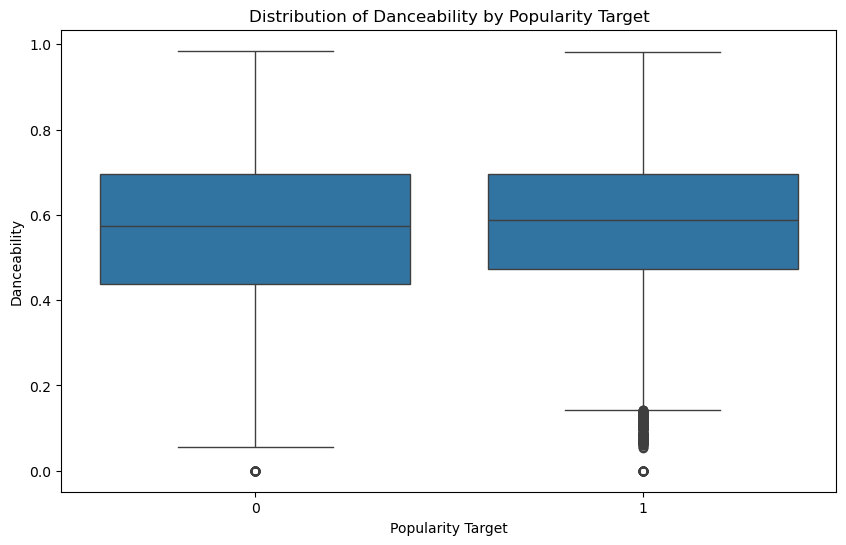

In [85]:
# Distribuição de músicas a partir de "danceability" para popular vs. não-popular 
plt.figure(figsize=(10, 6))
sb.boxplot(data=df_train, x='popularity_target', y='danceability')
plt.title('Distribution of Danceability by Popularity Target')
plt.xlabel('Popularity Target')
plt.ylabel('Danceability')
plt.show()

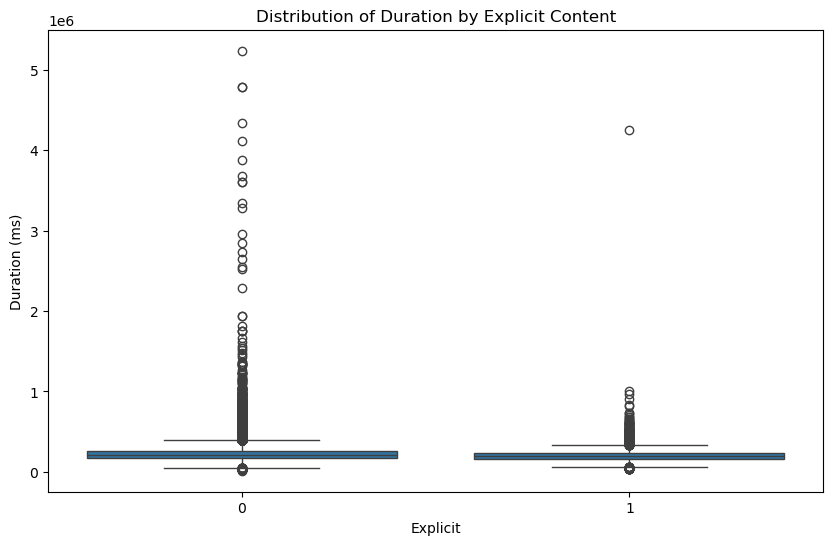

In [86]:
# Distribuição de duration_ms para "explicit" vs. "non-explicit" songs
plt.figure(figsize=(10, 6))
sb.boxplot(data=df_train, x='explicit', y='duration_ms')
plt.title('Distribution of Duration by Explicit Content')
plt.xlabel('Explicit')
plt.ylabel('Duration (ms)')
plt.show()

<Figure size 1200x800 with 0 Axes>

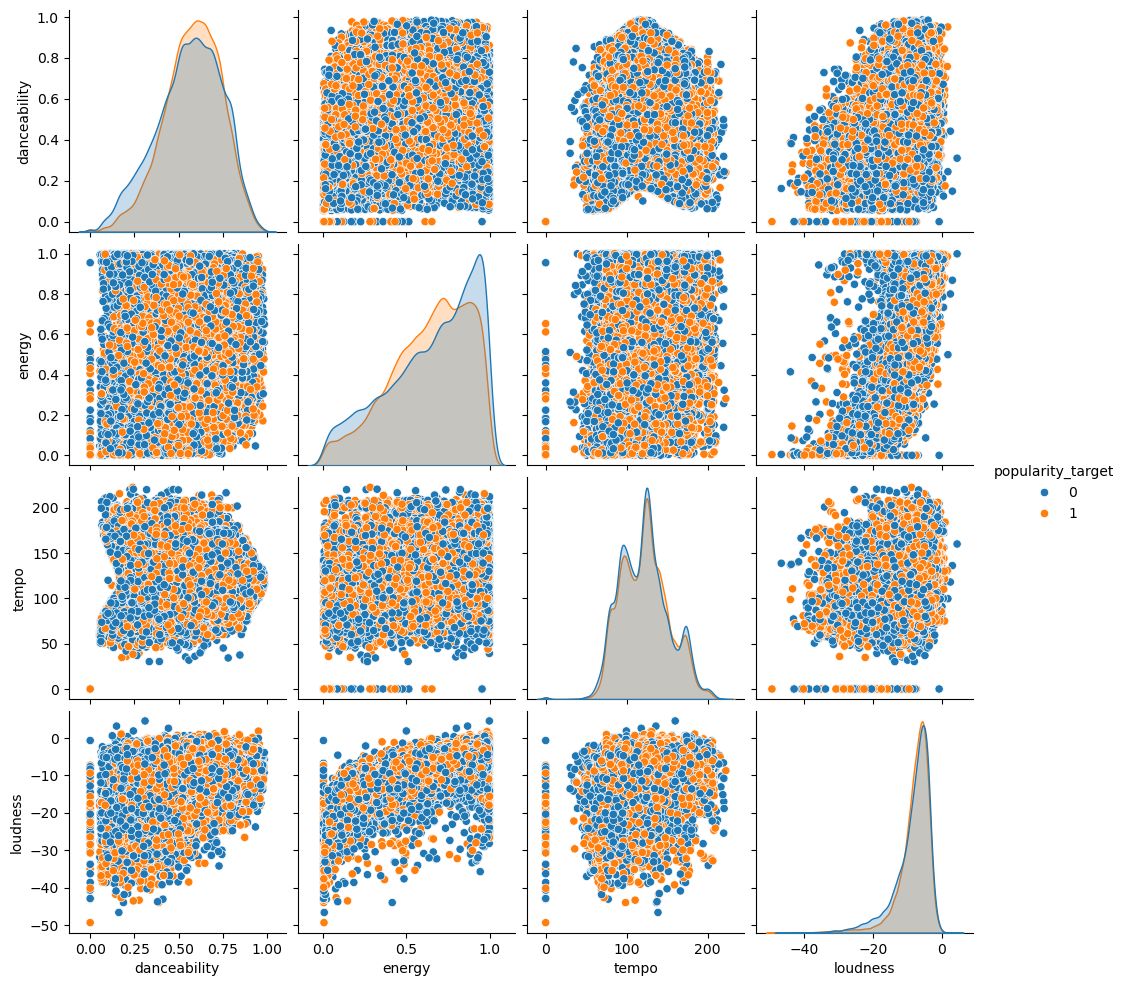

In [87]:
# Pairplot para features  numericas colorido por popularity_target
plt.figure(figsize=(12, 8))
sb.pairplot(df_train, vars=['danceability', 'energy', 'tempo', 'loudness'], hue='popularity_target')
plt.show()

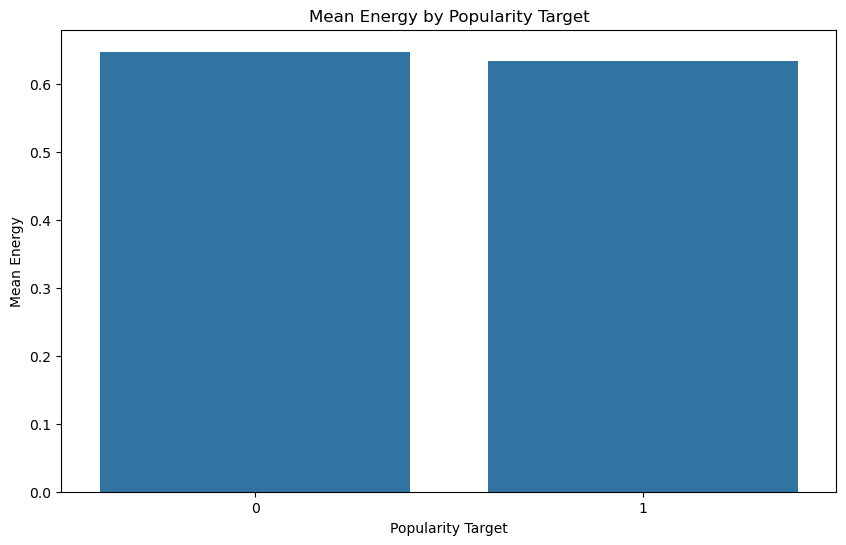

In [88]:
# Média por comparação para energia
mean_energy = df_train.groupby('popularity_target')['energy'].mean().reset_index()
plt.figure(figsize=(10, 6))
sb.barplot(data=mean_energy, x='popularity_target', y='energy')
plt.title('Mean Energy by Popularity Target')
plt.xlabel('Popularity Target')
plt.ylabel('Mean Energy')
plt.show()

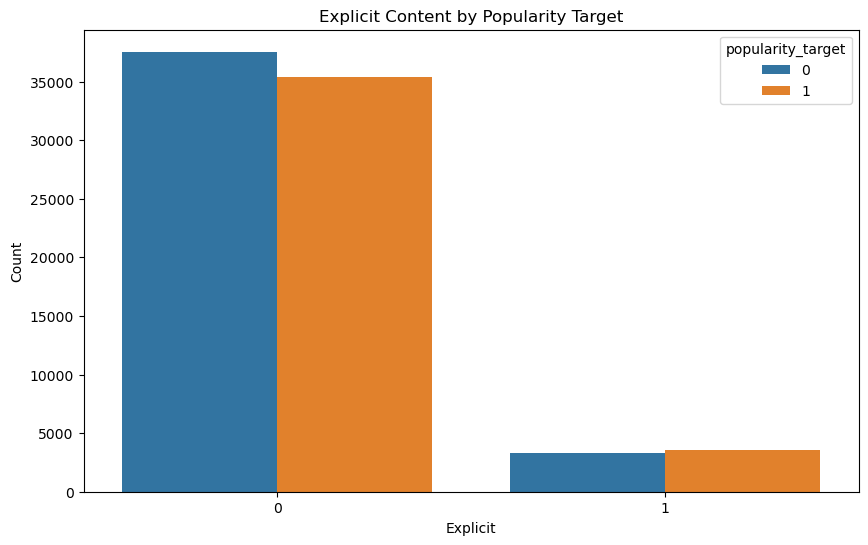

In [89]:
# Distribuição de conteúdo explícito por popularidade
plt.figure(figsize=(10, 6))
sb.countplot(data=df_train, x='explicit', hue='popularity_target')
plt.title('Explicit Content by Popularity Target')
plt.xlabel('Explicit')
plt.ylabel('Count')
plt.show()

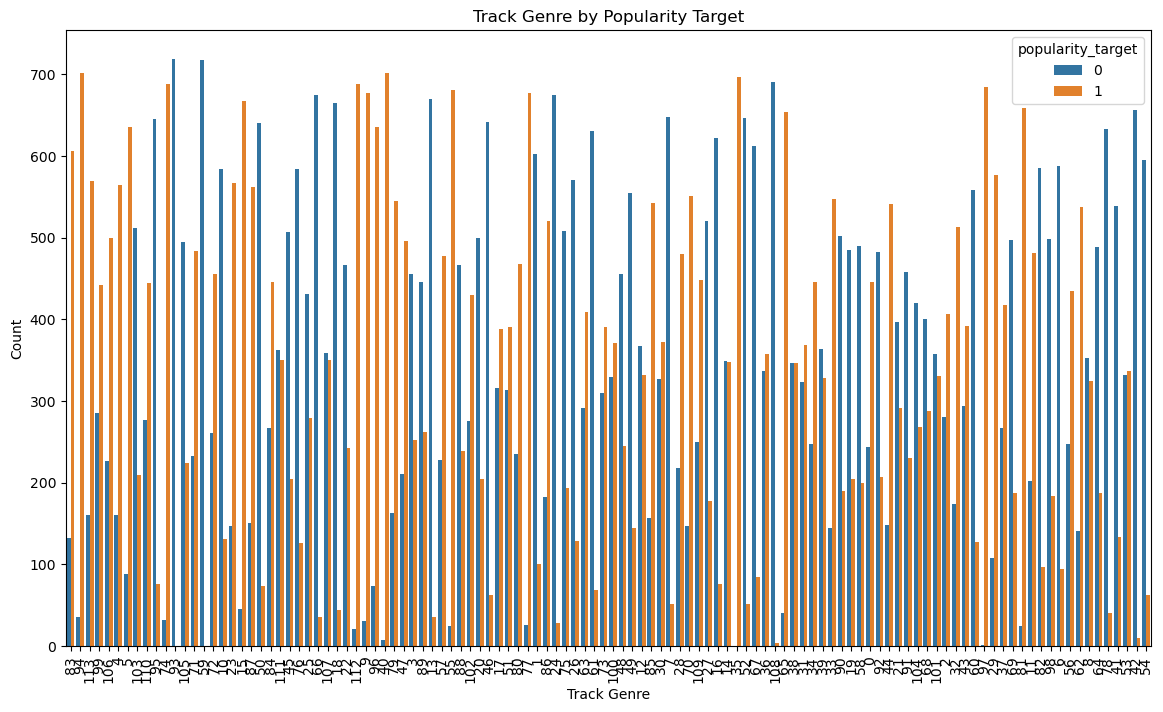

In [90]:
# Contagem de músicas em cada track_genre para músicas bem-sucedidas vs. não bem-sucedidas
plt.figure(figsize=(14, 8))
sb.countplot(data=df_train, x='track_genre', hue='popularity_target', order=df_train['track_genre'].value_counts().index)
plt.xticks(rotation=90)
plt.title('Track Genre by Popularity Target')
plt.xlabel('Track Genre')
plt.ylabel('Count')
plt.show()

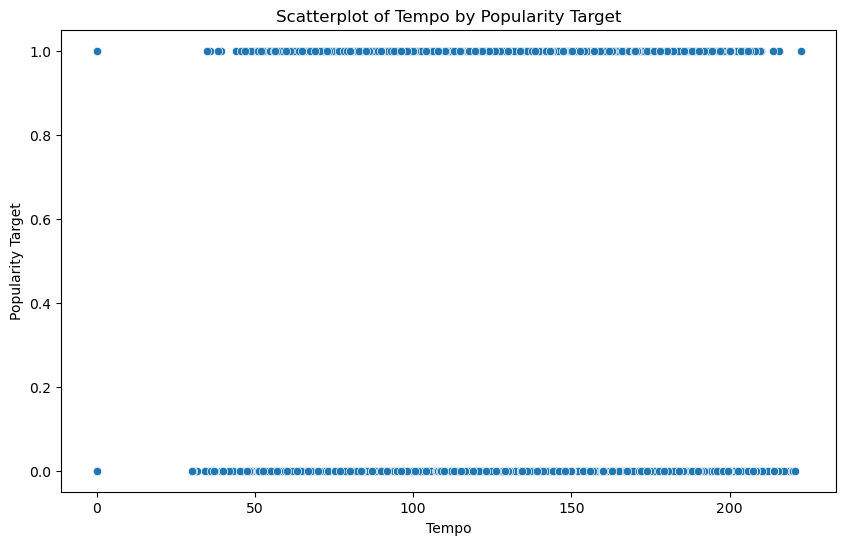

In [91]:
# Scatterplor de tempo vs popularidade
plt.figure(figsize=(10, 6))
sb.scatterplot(data=df_train, x='tempo', y='popularity_target')
plt.title('Scatterplot of Tempo by Popularity Target')
plt.xlabel('Tempo')
plt.ylabel('Popularity Target')
plt.show()

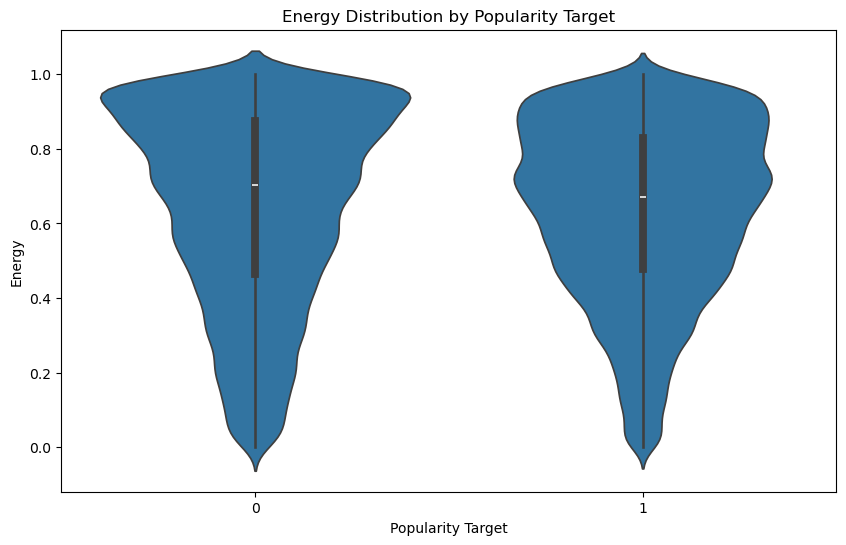

In [92]:
# Violin plot para distribuição de energia por popularidade
plt.figure(figsize=(10, 6))
sb.violinplot(data=df_train, x='popularity_target', y='energy')
plt.title('Energy Distribution by Popularity Target')
plt.xlabel('Popularity Target')
plt.ylabel('Energy')
plt.show()

### Hipóteses

Considerando como os dados estão distribuidos e a exploração dos dados, não existe nenhum valor único para prever a popularidade de uma música. Para que uma música seja o "próximo hit", ela depende não apenas de um valor mas de vários valores simultâneos que descrevem a música.
- A presença de conteúdo explícito impacta a popularidade de diferentes faixas. Músicas com conteúdo explícito ('explicit') podem ser menos populares.
- Músicas con conteúdo explícito tem uma duração menor.
- Energia está relacionada com "Loudness". A partir do correlation matrix, a maior relação presente são entre essas duas características.

### Preparação dos Dados e Modelagem

In [93]:
#DEFINIÇÃO FEATURES DO MODELO
features = ['track_unique_id', 'artists', 'duration_ms', 'explicit', 'danceability', 'energy', 'key', 'loudness',
       'mode', 'speechiness', 'acousticness', 'instrumentalness', 'liveness',
       'valence', 'tempo', 'track_genre']   

In [94]:
#Define o x como o datframe utilizando as colunas das features
x = df_train[features]
#Define o y como o dataframe utilizando os tipos (0,1,2,3)
y = df_train['popularity_target']

In [95]:
#Separa os dados em dados para treinar o modelo e dados para testar
x_train, x_test, y_train, y_test = train_test_split(x, y, test_size=0.2, random_state=42)

#### Finetuning de hiperparâmetros com randomsearch

In [96]:
from sklearn.model_selection import RandomizedSearchCV
from sklearn.ensemble import RandomForestClassifier
from scipy.stats import randint

# Definir o modelo
modelo = RandomForestClassifier()

# Definir a distribuição dos parâmetros
parametros = {
    'n_estimators': [50, 100, 200],  # Testando apenas 50 e 100
    'max_depth': [None, 10, 20],  # Testando apenas None e 10
    'min_samples_split': [2, 5],  # Testando apenas 2 e 5
    'min_samples_leaf': [1, 2, 4],
    'bootstrap': [True, False]
}

# Realizar o RandomizedSearch
random_search = RandomizedSearchCV(estimator=modelo, param_distributions=parametros, n_iter=10, cv=3, n_jobs=-1)
random_search.fit(x_train, y_train)

# Exibir os melhores parâmetros
print("Melhores parâmetros:", random_search.best_params_)

Melhores parâmetros: {'n_estimators': 200, 'min_samples_split': 2, 'min_samples_leaf': 4, 'max_depth': None, 'bootstrap': False}


In [97]:
from sklearn.ensemble import RandomForestClassifier

# Definição do modelo a ser usado
#model = RandomForestClassifier()

# aplica o modelo aos dados de treino
#model.fit(x_train, y_train)


### Modelo aplicado ao conjunto de TREINO (DOS TREINOS)

In [98]:
# Fazer previsões no conjunto de treinamento
y_train_pred = random_search.predict(x_train)

In [99]:
# Calculate acurácia no grupo de treino
train_accuracy = accuracy_score(y_train, y_train_pred)
print(f'Training Accuracy: {train_accuracy}')

Training Accuracy: 0.9944548872180451


In [100]:
# classification report do grupo de treino
train_report = classification_report(y_train, y_train_pred)

# Print classification do grupo de treino
print("Training Set Classification Report:")
print(train_report)

Training Set Classification Report:
              precision    recall  f1-score   support

           0       0.99      1.00      0.99     32623
           1       1.00      0.99      0.99     31217

    accuracy                           0.99     63840
   macro avg       0.99      0.99      0.99     63840
weighted avg       0.99      0.99      0.99     63840



### Modelo aplicado ao conjunto de TESTES (DOS TREINOS)

In [101]:
from sklearn.metrics import accuracy_score
from sklearn.metrics import classification_report

In [102]:
# Make predictions

#TESTE
#y_pred = model.predict(x_test)
y_pred = random_search.predict(x_test)

# Converter y_pred em um Pandas Series
y_pred_series = pd.Series(y_pred)

# Usar value_counts para ver quanto são populares e não populares
print(y_pred_series.value_counts())

0    8145
1    7815
Name: count, dtype: int64


In [103]:
# Calculatar a acurácia
accuracy = accuracy_score(y_test, y_pred)
print(f'Accuracy: {accuracy}')

Accuracy: 0.8501253132832081


In [104]:
# Calcular acurácia no grupo de treino
test_accuracy = accuracy_score(y_test, y_pred)
print(f'Training Accuracy: {test_accuracy}')

# Gerar o classification report
report = classification_report(y_test, y_pred)

# Imprimir o classification report
print("Classification Report:")
print(report)

Training Accuracy: 0.8501253132832081


Classification Report:
              precision    recall  f1-score   support

           0       0.86      0.85      0.85      8247
           1       0.84      0.85      0.85      7713

    accuracy                           0.85     15960
   macro avg       0.85      0.85      0.85     15960
weighted avg       0.85      0.85      0.85     15960



### Modelo aplicado ao conjunto DE TESTES

In [105]:
# Define features without 'popularity_target'
#features = ['track_unique_id', 'artists', 'duration_ms', 'explicit', 'danceability', 'energy', 'key', 'loudness',
#       'mode', 'speechiness', 'acousticness', 'instrumentalness', 'liveness',
#       'valence', 'tempo', 'time_signature', 'track_genre']

In [106]:
import random
# Define x_test for df_test using the same features as in training (without 'popularity_target')
x_test_df = df_test[features]  # The features list without 'popularity_target'

# Fazer previsões no df_test
#y_pred_df_test = model.predict(x_test_df)
y_pred_df_test = random_search.predict(x_test_df)

# Adicionar previsões to df_test
df_test['popularity_target'] = y_pred_df_test

# Display the first few rows of df_test with the new 'popularity_target' column
#print(df_test.head())

### Gerar CSV

In [107]:
import pandas as pd

track_unique_id_test = df_test.loc[x_test_df.index, 'track_unique_id']

# Fazer preditivisões 
y_pred_df_test = random_search.predict(x_test_df)

# Criar o DataFrame com track_unique_id predicted popularity_target preditivo
output_df = pd.DataFrame({
    'track_unique_id': track_unique_id_test,
    'popularity_target': y_pred_df_test
})

# Save the DataFrame to a CSV file
output_df.to_csv('output_predictions.csv', index=False)

print("Output saved to 'output_predictions.csv'.")

Output saved to 'output_predictions.csv'.


In [108]:
import pandas as pd

# Load the CSV file into a DataFrame
df = pd.read_csv('output_predictions.csv')

# Get the number of rows
num_rows = df.shape[0]

print(f'The CSV file has {num_rows} rows.')

The CSV file has 34200 rows.
